In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/mariabda2/ML_2022/main/init.py
import init; init.init(force_download=False); 

# **REGRESIÓN LINEAL Y REGRESIÓN LOGÍSTICA**
clase 03: regresión lineal<br/>
clase 04: regresión logística

## <font color='blue'>Niveles de abstracción</font>



*   **Alto nivel:** Selecciono un modelo (plantilla) que encaja en el problema que quiero resolver y uso una librería que tiene definido ya un criterio e implementado un algoritmo de entrenamiento. Me enfoco en ajustar el modelo a los datos y realizar el proceso de validación.
*   **Nivel intermedio:** Selecciono un modelo pero quiero modificar la función de costo para el entrenamiento. Uso una librería de cálculo simbólico para la optimización de la nueva función.
*  **Bajo nivel:** Selecciono el modelo el modelo y decido cambiar la función criterio y/o el algoritmo de optimización, o incluso hacer cambios en la formulación del modelo.



El último nivel es necesario sobre todo en casos en los que se abordan problemas avanzados en los que las soluciones predefinidas no son suficientes para alcanzar un solución satisfactoria.

## <font color='blue'>Modelos básicos de aprendizaje</font>

**El modelo**. Supongamos que queremos modelar un conjunto de datos empleando una función polinomial de la forma:

$$
f({\bf{x}},{\bf{w}} ) = w_0 + w_1 x +  w_2 x^2 + \cdots + w_Mx^M = \sum_{j=0}^{M} w_j x^j
$$

donde $M$ es el orden del polinomio, $x$ las variables y $w$ los pesos. 

En este caso particular, la función polinomial corresponde al $modelo$ que se va utilizar. Se debe definir el criterio por el cual se van ajustar los parámetros del modelo, en particular los pesos $w_j$ 

**El criterio** (función de costo). 
La función de error más usada es el error cuadrático medio (MSE, del inglés mean squared error):

$$
ECM({\bf{w}}) = \frac{1}{N}\sum_{i=1}^{N} \left\lbrace f({\bf{x}}_i, {\bf{w}}) - t_i \right\rbrace^2 
$$

Con esta función de error podemos hallar una $f$ para la cual, la distancia perpendicular de los puntos $x_i$ a $f$ sea mínima.

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

#### **Ejemplo típico de regresión lineal** 
Cada que corra el siguiente bloque de código tendrá una predicción diferente

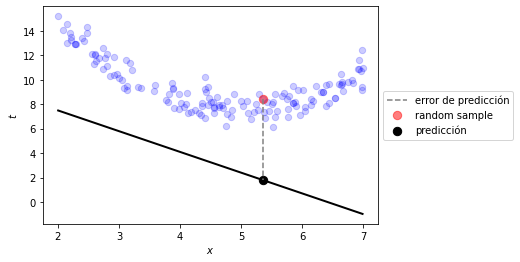

In [3]:
from local.lib.util import plot_model_reg

def linear_prediction(t, x):
    t0,t1 = t
    return t0 + t1*x
    
t0 = np.random.random()*5+10
t1 = np.random.random()*4-3

plot_model_reg([t0,t1], linear_prediction)

#### **Ejemplo con datos generados artificialmente** 
A partir del conjunto de muestras obtenido con $y$, reconstruya el modelo dado.

$$
y = 3*x_1 + 7*x_2 - 2
$$

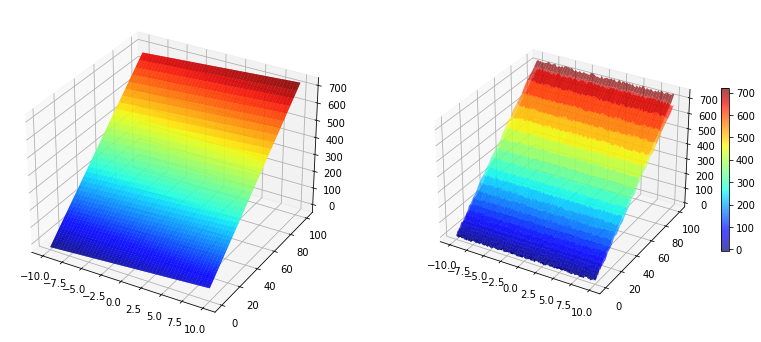

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,6))
x1 = np.linspace(-10,10,100).reshape(100, 1)
x2 = x1**2

#Polinomio real
y = 3*x1 + 7*x2 - 2
X1, X2 = np.meshgrid(x1, x2)
Y = 3*X1 + 7*X2 - 2

# Nivel de error
Perror = 0.1

#Generar ruido en la medición
y2 = y + Perror*np.std(y)*(np.random.rand(100,1) - 0.5)
Y2 = y + Perror*np.std(y)*(np.random.rand(100,100) - 0.5)

#plots
## surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X1, X2, Y, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)

# muestras con ruido
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X1, X2, Y2, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
cb = fig.colorbar(p, shrink=0.5)



#### **<font color='blue'>  Estrategia de alto nivel (caja negra) </font>**
Librería Sklearn dentro de las plantillas de modelos lineales tiene una para regresión lineal. 

* [reg] es el objeto de regresión lineal
* Tengo conocimiento de la entrada y salida del modelo
* [fit] hago el entrenamiento del modelo



In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.c_[x1,x2], y2)

**¿Cómo hacemos una predicción?**

In [6]:
reg.predict(np.array([8,5]).reshape(1,-1))

array([[57.96178219]])

**¿Cuáles son los parámetros del modelo?**
Recordemos que el Polinomio real es $y$ = $3*x_1$ + $7*x_2$ - $2$

In [7]:
print(reg.coef_)
print(reg.intercept_)

[[3.16559379 7.01370291]]
[-2.43148269]


**¿Cuál es el error de la predicción?**


In [8]:
def ECM(w,x,y):
    w = w.reshape(1,-1)
    x = np.c_[x,np.ones((x1.shape[0],1))]
    return np.mean((np.dot(w,x.T).T-y)**2)

ECM(np.c_[reg.coef_,reg.intercept_], np.c_[x1,x2], y2)

38.839414257102

#### **<font color='blue'>  Estrategia de nivel intermedio </font>**

* Sabemos que el problema que debemos resolver corresponde a un problema de minimización sin restricciones.

* Usaremos una librería llamada Scipy que tiene una función para realizar el proceso de optimización

* Se optimizará los pesos de $w$ a partir de la función ECM

* Si ECM no me satisface, puedo cambiar la función


**¿Cuáles son los parámetros del modelo?**

In [9]:
from scipy.optimize import minimize
r1 = minimize(lambda w: ECM(w, np.c_[x1,x2], y2), np.random.random(size=3))
r1.x

array([ 3.16559377,  7.01370291, -2.43148305])

**¿Cuál es el error de la predicción?**

In [10]:
ECM(r1.x, np.c_[x1,x2], y2)

38.83941425710214

**¿Cómo hacemos una predicción?**

In [11]:
np.dot(r1.x,np.array([8,5,1]))

57.961781681232004

### **<font color='blue'>  Estrategia de más bajo nivel </font>**
**Gradiente descendetente**

Un algoritmo simple que nos permite solucionar el problema de optimización es el Algoritmo de **Gradiente Descendente**. Un problema de optimización puede tener múltiples formas o algoritmos para resolverse, cuando el problema de optimización es <b>convexo</b> podemos esperar que casi con cualquier método encontremos el valor del parámetro que hace la función óptima, sin embargo, es posible que el problema de optimización no sea convexo, en cuyo caso el algoritmo o método de optimización juega un rol más importante.


<br/> También es importante tener en cuenta la velocidad de convergencia del algoritmo o método de optimización, el costo computacional y el número de parámetros libres. El algoritmo de gradiente descendente consiste en aplicar iterativamente la siguiente regla:

$$
w_j(iter) = w_j(iter-1) - \eta \frac{\partial E({\bf{w}})}{\partial w_j}
$$

donde $\eta$ se conoce como la tasa de aprendizaje.<br/>


<br/> Para efectos de cálculo podemos asumir que el vector $x_i$ contiene todas las características de la muestra $i$ y una característica adicional con valor de 1, que multiplicará al término independiente $w_0$.

$$
\frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right) \frac{\partial }{\partial w_j} f({\bf{x}}_i, {\bf{w}})
$$
<br/>
$$
\frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)x_{ij}
$$


<br/>La regla de actualización de los pesos en cada iteración estará entonces dada por:

$$
w_j(iter) = w_j(iter-1) - \frac{\eta}{N} \sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)x_{ij}
$$

$$
w_j(iter) = w_j(iter-1) - \frac{\eta}{N} \sum_{i=1}^{N}\left( \sum_{k=0}^{d} w_k x_{ik} - y_i\right)x_{ij} 
$$



<br/> Si queremos hayar un $\bf{w}$ que minimice el error en el problema de regresión lineal, entonces derivamos la función de error con respecto a cada uno de los parámetros $w_j$:

$$
\frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\frac{\partial }{\partial w_j}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)^2\\
$$


<br/> Si la solución de un problema requiere que sigamos una estrategia de más bajo nivel, entonces se hacen más importantes conceptos de algebra lineal y cálculo, en muchos casos no sólo para comprender los algoritmos, sino también para realizar implementaciones computacionalmente más eficientes.

**Encontrar los parámetros es un proceso ITERATIVO**

[[ 3.16559379]
 [ 7.01370291]
 [-2.43148269]]


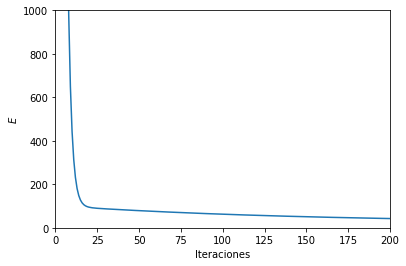

In [12]:
#Inicialización
MaxIter = 1000000
w = np.ones(3).reshape(3, 1)
eta = 0.0001
N = len(x1)
Error =np.zeros(MaxIter)

#Matriz extendida
X = np.array([x1,x2,np.ones((100,1))]).reshape(3, 100);

#Iteraciones
for i in range(MaxIter):
    tem = np.dot(X.T,w)
    tem2 = tem-np.array(y2)
    Error[i] = np.sum(tem2**2)/(2*N)
    tem = np.dot(X,tem2)
    w = w - eta*tem/N
#Gráfica
print(w)
plt.ylim(0,1000)
plt.xlim(0,200)
plt.ion()
plt.plot(np.linspace(0,MaxIter,MaxIter),Error)
plt.xlabel('Iteraciones')
plt.ylabel('$E$')
plt.show()

In [13]:
ECM(w, np.c_[x1,x2], y2)

38.83941425710202

In [14]:
np.dot(w.T,np.array([8,5,1]))

array([57.96178219])

----------------------------------------------------------------------------------------------------------------------------------------------

## **<font color='blue'>  Problema de clasificación </font>**

### **Regresión logística**

Una forma alternativa de entender el problema de clasificación, es buscar una función que sea capaz de dividir el espacio de características y dejar los conjuntos de muestras de cada clase separados.

La variable a predicir no es continua, sino que toma valores discretos.

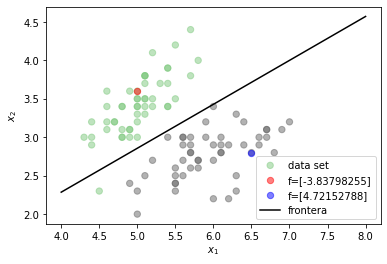

In [15]:
from local.lib.util import plot_frontera
plot_frontera()

Cuando es posible dejar todas las muestras de una clase a un lado de la recta, y las muestras de la otra clase al otro, el problema se conoce como linealmente separable. Sin embargo eso no sucede en la gran mayoría de problemas reales. El problema de clasificación se puede entonces pensar como el problema de encontrar una función polinomial $f$ que pueda dividir los conjuntos de datos de las diferentes clases.

#### Observando la figura anterior:

Si se pudiese encontrar la función dada por la línea negra en la figura anterior, la cual sería de la forma $f({\bf{x}}) = w_1 x_1 + w_2 x_2 + w_0$, se podría utilizar como función de clasificación ya que cualquier muestra evaluada en la función obtendrá como resultado un valor positivo si se ubica a un lado y un valor negativo si se ubica al otro (los valores ubicados justo en la función obtendrían un valor de 0). Teniendo en cuenta que los valores de las etiquetas para el problema de clasificación (las variables a predecir $t_i$), solo pueden tomar dos valores ${0,1}$, entonces una forma simple de usar la función $f$ como clasificador sería asignar las muestras a la clase 1 cuando al ser evaluadas en la función $f$ obtengan una valor positivo y asignar 0 cuando suceda lo contrario.

$$\text{Class} = \left\{
                \begin{array}{ll}
                  1\;\;\;{\rm{if}}\;\;\;w_0  + w_1 x_1  + w_2 x_2  +  \cdots  + w_d x_d  \geq 0\\
                  0\;\;{\rm{\text{other wise}}}
                \end{array}
              \right. $$

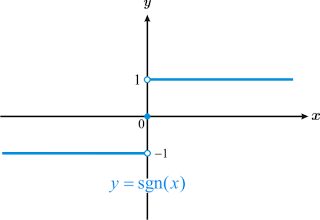

In [16]:
Image("local/imgs/funcionsigno.png", width = 300)

El problema con la función $sgn$ es que es discontinua y no puede ser usada como criterio de optimización para ningún algoritmo basado en gradiente. Un alternativa es utilizar alguna función que tenga una comportamiento asintótico similar pero que sea continua y derivable, por lo que podemos usar la función sigmoide dada por:

$$
g(u) = \frac{\exp(u)}{1 + \exp(u)}
$$

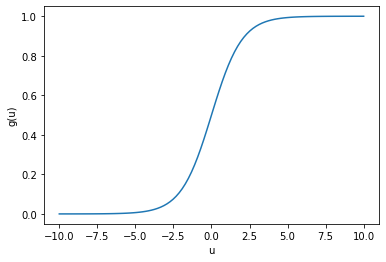

In [17]:
u=np.linspace(-10,10,100)
g = np.exp(u)/(1 + np.exp(u))
plt.plot(u,g)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.show()

El método que utiliza la función sigmoidal para encontrar una frontera de separación polinomial se conoce como <b>Regresión Logística</b>. La función objetivo (criterio de entrenamiento) está dada por:

$$
J({\bf{w}}) = \frac{1}{N} \sum_{i=1}^{N} -t_i \log(g(f({\bf{x}}))) - (1-t_i)\log(1 - g(f({\bf{x}})))
$$

Si se analiza con detenimiento, la función criterio $J$ minimiza el error de clasificación. Es necesario tener en cuenta que dicha función está definida para $t_i$ que toman valores $\left\lbrace 0,1 \right\rbrace$. La ventaja del método de regresión logística es que la función para la actualización de los pesos $\bf{w}$ es muy similar a la función para la regresión lineal. La derivada de $J$ está dada por:

$$
\frac{\partial J({\bf{w}})}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N}\left( g(f({\bf{x}}_i,{\bf{w}})) - t_i\right)x_{ij}
$$

La única diferencia es la inclusión de la función sigmoidal $g$. Por esa razón podemos usar el mismo algoritmo con solo una pequeña modificación. 

In [18]:
def sigmoide(u):
        g = np.exp(u)/(1 + np.exp(u))
        return g
def Gradiente(X2,y2,MaxIter = 10000, eta = 0.001):
    w = np.ones(3).reshape(3, 1)
    N = len(y2)
    Error =np.zeros(MaxIter)
    Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

    for i in range(MaxIter):
        tem = np.dot(Xent,w)
        tem2 = sigmoide(tem.T)-np.array(y2)
        Error[i] = np.sum(abs(tem2))/N
        tem = np.dot(Xent.T,tem2.T)
        wsig = w - eta*tem/N
        w = wsig
    return w, Error

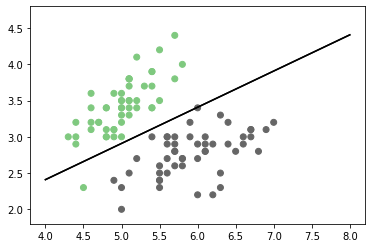

In [19]:
from sklearn import datasets
import time
fig, ax = plt.subplots(1,1)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
ax.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent")

w,_ = Gradiente(X2,y2,MaxIter = 1)
x1 = np.linspace(4,8,20)
x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
line1, = ax.plot(x1,x2,'k')

for i in range(1,10000,100):
    w,_ = Gradiente(X2,y2,MaxIter = i)
    x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
    line1.set_ydata(x2)
    if i > 1000:
        ax.set_ylim([1.8,4.8])
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(.300)
line1, = ax.plot(x1,x2,'k')

#### Veamos el mismo proceso en el espacio de búsqueda

In [20]:
import itertools
def n_grad(X2,t,w):
    N = X2.shape[0]
    Xent = np.concatenate((X2,np.ones((X2.shape[0],1))),axis=1)
    return 2*Xent.T.dot(sigmoide(Xent.dot(w))-t)/N

def cross_entropy(X2,t,w):
    epsilon=1e-12
    Xent = np.concatenate((X2,np.ones((X2.shape[0],1))),axis=1)
    predictions = np.clip(sigmoide(np.dot(Xent,w.T)), epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -(np.sum(t*np.log(predictions+1e-9))+np.sum((1-t)*np.log(1-predictions)))/N
    return ce

def plot_cost(cost, t0_range, t1_range, vx=None,vy=None, vz=None):
    k0,k1 = 60,60

    t0 = np.linspace(t0_range[0], t0_range[1], k0)
    t1 = np.linspace(t1_range[0], t1_range[1], k1)

    p = np.zeros((k0,k1))

    for i,j in itertools.product(range(k0), range(k1)):
        p[i,j] = np.log(cost(np.r_[t0[i],t1[j], vz]))

    plt.contourf(t0, t1, p.T, cmap=plt.cm.hot, levels=np.linspace(np.min(p), np.max(p), 20))
    plt.ylabel(r"$w_2$")
    plt.xlabel(r"$w_1$")
    plt.title("loss")
    plt.colorbar()

    if vx is not None:
        plt.axvline(vx, color="white")
    if vy is not None:
        plt.axhline(vy, color="white")

In [21]:
from scipy.optimize import minimize
g = []
loss_history = []
def log(xk):
    loss_history.append(loss(xk))
    g.append(xk)
#Estoy graficando una función de tres variables pero sólo dos de los ejes, debo garantizar la misma región del espacio
init_t = np.ones(3)#np.random.random(size=3)

loss = lambda t: cross_entropy(X2,y2,t)
r = minimize(loss, init_t, callback=log, method="BFGS")

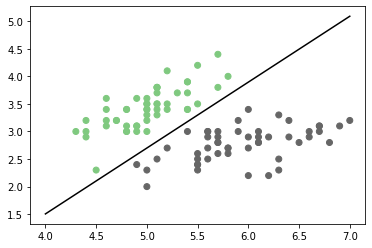

In [22]:
x1 = np.linspace(4,7,20)
fig, ax = plt.subplots(1,1)
ax.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
x2 = -(r.x[0]/r.x[1])*x1 - (r.x[2]/r.x[1])
line1, = ax.plot(x1,x2,'k')

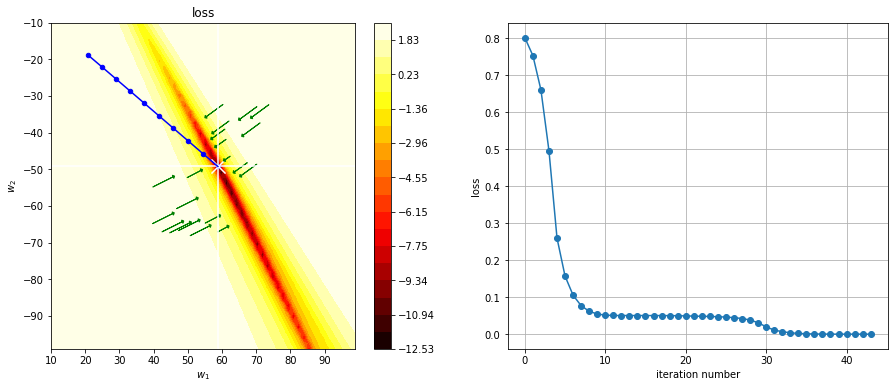

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plot_cost(loss, (10,99), (-10,-99), vx=r.x[0], vy=r.x[1], vz=r.x[2])
g = np.r_[g]
plt.plot(g[-10:,0], g[-10:,1], color="blue")
plt.scatter(g[-10:,0], g[-10:,1], color="blue", s=20)
plt.scatter(g[-1,0], g[-1,1], marker="x", color="white", s=200)

# plot gradient at some points
for _ in range(10):
    t = np.random.random()*20+r.x[0], np.random.random()*20+r.x[1], r.x[2]
    grad = n_grad(X2,y2,t)
    plt.arrow(t[0], t[1], -grad[0], -grad[1], head_width=1, head_length=0.5, fc='green', ec='green')
for _ in range(10):
    t = -np.random.random()*20+r.x[0], -np.random.random()*20+r.x[1], r.x[2]
    grad = n_grad(X2,y2,t)
    plt.arrow(t[0], t[1], -grad[0], -grad[1], head_width=1, head_length=0.5, fc='green', ec='green')

plt.subplot(122)
plt.plot(loss_history, marker="o")
plt.xlabel("iteration number")
plt.ylabel("loss")
plt.grid()

### zoom al óptimo

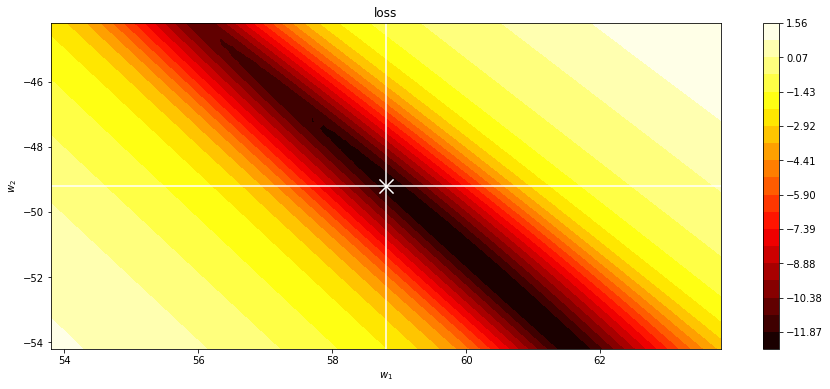

In [24]:
plt.figure(figsize=(15,6))
plot_cost(loss, (r.x[0]-5,r.x[0]+5), (r.x[1]-5,r.x[1]+5), vx=r.x[0], vy=r.x[1], vz=r.x[2])
plt.scatter(g[-1,0], g[-1,1], marker="x", color="white", s=200)

#### Veamos el efecto del número de iteraciones y de la tasa de aprendizaje:

In [25]:
def GradientSigmo(MaxIter=10000, eta = 0.001):
    plt.clf()
    plt.figure(figsize=(30,10))
    plt.axis([None, None, 0, 100])
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    X2 = X[:100][:,:2]
    y2 = y[:100]
    #Aprendizaje
    w = np.ones(3).reshape(3, 1)
    N = len(y2)
    Error =np.zeros(MaxIter)
    Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

    for i in range(MaxIter):
        tem = np.dot(Xent,w)
        tem2 = sigmoide(tem.T)-np.array(y2)
        Error[i] = np.sum(np.abs(tem2))/N
        tem = np.dot(Xent.T,tem2.T)
        wsig = w - eta*tem/N
        w = wsig


    print(w)
    print('Error=',Error[-1])
    #Grafica de la frontera encontrada
    plt.subplot(1,2,2)
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    X2 = X[:100][:,:2]
    y2 = y[:100]
    plt.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
    x1 = np.linspace(4,8,20)
    x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
    
    plt.plot(x1,x2)
    plt.show()
    print(MaxIter,eta)

Para poder interactuar con la funcion anterior, adicionar una celda de codigo y copiar las siguientes instrucciones.

```python
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(GradientSigmo,MaxIter=[1,10,100,1000,10000], eta=[0.0001,0.001,0.1,1,10]);    
```

**Nota**
[Actualmente los jupyter books no son compatibles con los widgets, es necesaria configuración adicional](https://jupyterbook.org/en/stable/interactive/interactive.html#ipywidgets)

#### Bibliografy

[1] Bishop, C.M. Pattern Recognition and Machine Learning. Springer, 2006.

[2] Murphy K.P., Machine Learning: A Probabilistic Perspective. The MIT Press, 2012.